In [1]:
# Data handling
# !pip install pandas numpy

# NLP preprocessing
# !pip install nltk

# Machine learning models and evaluation
# !pip install scikit-learn

# Install the wordcloud library, which is used to generate word cloud visualizations
!pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Import relevant libraries

In [2]:
# Import essential libraries
import pandas as pd   # for data manipulation and analysis using DataFrames
import numpy as np    # for numerical computations and array operations


# 2. Import News Classification Dataset

In [3]:
df = pd.read_csv("News_classifier.csv")
df

,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics
...,...,...,...
5509,Nigeria’s Central Bank Introduces ‘Naira 4 Dol...,The Central Bank of Nigeria (CBN) has introduc...,business
5510,Super Eagles to Host Leone Stars in AFCON 2023...,Following Tuesday night’s draw for the qualifi...,sports
5511,Frustration in Nigeria Breeding Calls for Sece...,"Ekiti State Governor, Dr. Kayode Fayemi on Tue...",politics
5512,Coca-Cola European Buys Australian Bottler for...,Coca-Cola European Partners Plc has agreed to ...,business


## Explanation

- Columns: Title (headline), Excerpt (summary), Category (news label).

- Rows: 5514 news articles, indexed 0–5513.

- Sample: Shows first few articles with their categories, e.g., sports, business, health.

- Purpose: Quick preview to understand dataset structure before analysis or modeling.

---
# 3.  Exploratory Data Analysis (EDA)

 Rows with missing values in important columns were removed to ensure data consistency.


In [4]:
# Check shape
print("Dataset Shape:", df.shape)

Dataset Shape: (5514, 3)


In [5]:
# Check missing values
missing = df.isnull().any().sum()
missing

np.int64(1)

In [6]:
## Check column types
df.dtypes

Title       object
Excerpt     object
Category    object
dtype: object

In [7]:
col = df.columns[df.isnull().any()].tolist()
col

['Title']

In [8]:
for each in df.columns:
    print("Column: ",each) # the column name
    print(df[each].nunique()) # the number of unique values in that column
    print("~"*100) # a separator line for better readability

Column:  Title
5313
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column:  Excerpt
5313
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column:  Category
6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     5513 non-null   object
 1   Excerpt   5514 non-null   object
 2   Category  5514 non-null   object
dtypes: object(3)
memory usage: 129.4+ KB


## Explanation

- Dataset shape: 5514 rows × 3 columns (Title, Excerpt, Category).

- Missing values: Only 1 missing value in Title.

- Column types: All columns are object (text).

- Unique values:

    - Title: 5313 unique headlines

    - Excerpt: 5313 unique summaries

    - Category: 6 distinct news categories

- Purpose: Confirms dataset is mostly complete and ready for preprocessing; identifies the column (Title) with a missing value to handle.

---
# 4. Handle Missing Values

In [10]:
# Drop rows with missing values in Title, Excerpt, or Category
df = df.dropna(subset=['Title', 'Excerpt', 'Category'])

# Verify missing values are gone
df.isnull().sum()


Title       0
Excerpt     0
Category    0
dtype: int64

## Explanation

- Action taken: Dropped rows that had missing values in Title, Excerpt, or Category.

- Result: All missing values are removed.

- Verification: Title, Excerpt, and Category now have 0 missing entries.

- Purpose: Ensures dataset consistency and avoids errors during preprocessing or model training.

---
# 5. Combine Title + Excerpt
 The Title and Excerpt columns are merged to form a single text feature in order to capture both concise keywords and contextual information.

In [11]:
# Wrong attempt (mistake): assigned directly to a slice, which gives SettingWithCopyWarning
# df['text'] = df['Title'] + ' ' + df['Excerpt']

# Corrected code: make a copy and safely assign
df = df.copy()  # create a copy to avoid warnings
df['text'] = df['Title'].astype(str) + ' ' + df['Excerpt'].astype(str)
# Show first 5 rows of Title, Excerpt, and combined text
df[['Title', 'Excerpt', 'text']].head()

,Title,Excerpt,text
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,"Uefa Opens Proceedings against Barcelona, Juve..."
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,Amazon Blames Inflation as It Increases Cost o...
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,Nigeria’s Parliament Passes Amended Electoral ...
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",Nigeria: Lagos Governor Tests Positive for Cov...
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,South Africa Calls For Calm as Electoral Refor...


## Explanation

- Action taken: Merged Title and Excerpt columns into a new text column.

- Purpose: Combines concise headlines with contextual content to create a richer text feature for analysis.

- Correction: Made a copy of the DataFrame before assignment to avoid SettingWithCopyWarning.

- Result: Each row now has a single text column containing the full article content, ready for preprocessing.

---
# 6. Visualize category distribution

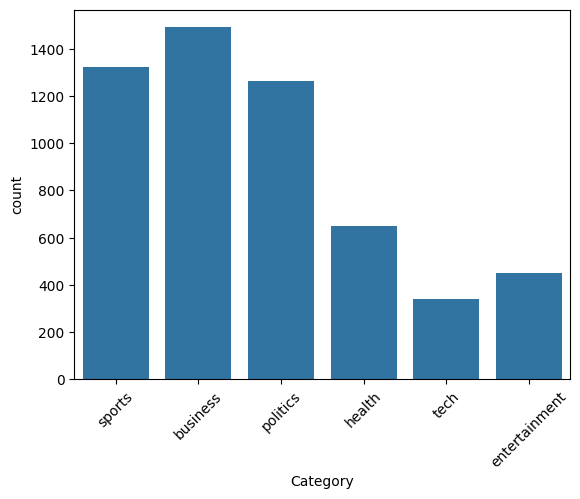

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
# Wrong attempt (mistake): forgot to import matplotlib, so plt.xticks would fail
sns.countplot(data=df, x='Category')
plt.xticks(rotation=45)
plt.show()


## Explanation

- Action: Visualized the distribution of news categories using a bar plot.

- Observation from the plot:

    - business articles are the most frequent.

    - sports and politics also have high counts.

    - health, entertainment, and especially tech are less frequent.

- Insight: The dataset is imbalanced, which may affect model performance, particularly for underrepresented categories like tech and entertainment.

- Purpose: Helps understand class distribution before training a classification model and informs potential strategies like oversampling, undersampling, or class weighting.



---

## 7. Text Preprocessing

Text preprocessing includes:
- Lowercasing
- Removing punctuation and numbers
- Stopword removal
- Lemmatization


In [13]:
# Text preprocessing libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers, punctuation, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Check first 5 cleaned texts
df[['text', 'clean_text']].head()


,text,clean_text
0,"Uefa Opens Proceedings against Barcelona, Juve...",uefa open proceeding barcelona juventus real m...
1,Amazon Blames Inflation as It Increases Cost o...,amazon blame inflation increase cost prime eur...
2,Nigeria’s Parliament Passes Amended Electoral ...,nigeria parliament pass amended electoral bill...
3,Nigeria: Lagos Governor Tests Positive for Cov...,nigeria lagos governor test positive covid kad...
4,South Africa Calls For Calm as Electoral Refor...,south africa call calm electoral reform protes...


## Explanation

- Action taken: Applied text preprocessing to the combined text column.

- Steps included:

    - Converted text to lowercase.

    - Removed numbers, punctuation, and special characters.

    - Tokenized the text.

    - Removed English stopwords.

    - Applied lemmatization to reduce words to their base form.

- Result: Created a new column clean_text with simplified, normalized text suitable for feature extraction and modeling.



# 8. Most Frequent Terms in the News Corpus (Word Cloud Representation)

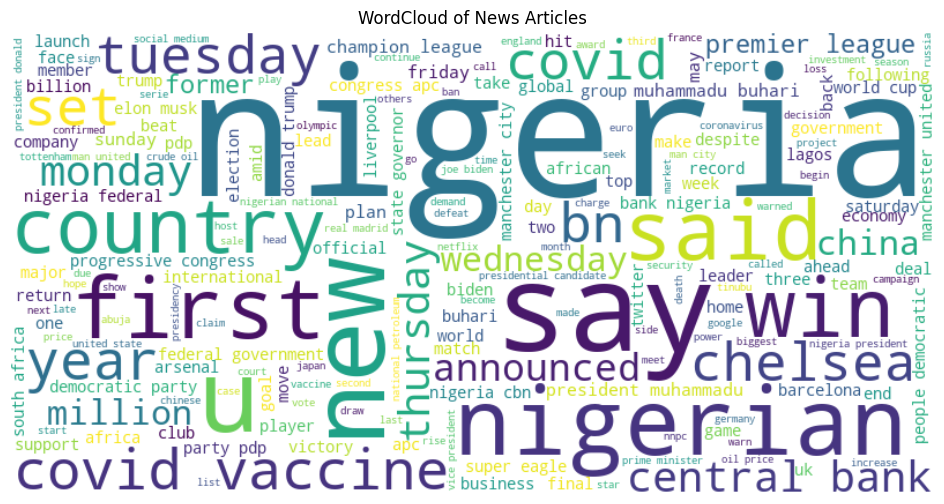

In [14]:
from wordcloud import WordCloud

# Generate wordcloud for cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))

# Display the wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of News Articles")
plt.show()


## Explanation

- Action: Generated a WordCloud to visualize the most frequent words across all news articles.

- Observation from the WordCloud:

    - Words that appear larger are more frequent in the dataset.

    - Common terms like nigeria, president, say, covid, etc., dominate the news corpus.

- Purpose: Provides a quick visual summary of the dataset’s content, highlighting prominent keywords and helping understand the textual patterns before model training.

- Note: WordCloud focuses on raw word frequency, not weighted importance (like TF-IDF), so it shows what words appear most often regardless of context.


---
# 9. Check Most repeated word

In [15]:
from collections import Counter

# Combine all cleaned text into a single string
all_text = ' '.join(df['clean_text'])

# Split into words and convert to lowercase (already lowercase, but safe)
words = all_text.split()

# Count the 10 most common words
common_words = Counter(words).most_common(10)

print(common_words)


[('nigeria', 2620), ('say', 786), ('president', 785), ('covid', 744), ('nigerian', 643), ('governor', 606), ('u', 594), ('state', 539), ('new', 536), ('first', 467)]


## Explanation

- Action: Counted the most frequent words in the cleaned text using Python’s Counter.

- Top 10 Words and Frequency:

1. nigeria – 2620 occurrences

2. say – 786 occurrences

3. president – 785 occurrences

4. covid – 744 occurrences

5. nigerian – 643 occurrences

6. governor – 606 occurrences

7. u – 594 occurrences

8. state – 539 occurrences

9. new – 536 occurrences

10. first – 467 occurrences

- Purpose: Highlights the most repeated keywords in the dataset, giving insight into the main topics and entities mentioned frequently in the news articles.

- Observation: Words like nigeria, president, and covid dominate, reflecting a strong focus on political and health-related news.

--- 
# 10. Train–Test Split

The dataset is split into training and testing sets before feature extraction 
to avoid data leakage.


In [16]:
# Split dataset into training and testing sets (80-20)
from sklearn.model_selection import train_test_split

# Wrong attempt (mistake): forgot to split before TF-IDF
# Corrected approach
# Features and labels
X = df['clean_text']
y = df['Category']


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4410
Testing samples: 1103


## Explanation

- Action: Split the dataset into training and testing sets before converting text to TF-IDF features.

- Reason: Prevents data leakage by ensuring the model does not “see” test data during feature extraction or training.

- Details:

    - Features (X) = clean_text column

    - Labels (y) = Category column

    - Split ratio = 80% training, 20% testing

    - stratify=y ensures class distribution in train/test sets matches the original dataset.

- Output:

    - Training samples: 4410

    - Testing samples: 1103

- Purpose: This step prepares the data for model training while maintaining a representative distribution of categories.

---
# 11. TF-IDF Feature Extraction

TF-IDF is applied to convert textual data into numerical feature vectors.
The vectorizer is fitted only on the training data to prevent data leakage.


In [17]:
# Convert text to TF-IDF numerical features
from sklearn.feature_extraction.text import TfidfVectorizer
# Wrong attempt (mistake): fitting TF-IDF on full dataset
# tfidf = TfidfVectorizer()
# tfidf.fit_transform(df['clean_text'])

# Corrected approach
# Initialize TF-IDF with max 5000 features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit TF-IDF on training set and transform both training and testing sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check shapes
X_train_tfidf.shape, X_test_tfidf.shape



((4410, 5000), (1103, 5000))

## Explanation

- Action: Convert text data into numerical features using TF-IDF (Term Frequency–Inverse Document Frequency).

- Reason: Machine learning models require numeric input, so TF-IDF represents each document as a weighted vector reflecting word importance.

- Details:

    - max_features=5000 limits to the 5000 most important words to reduce dimensionality.

    - ngram_range=(1,2) captures both single words (unigrams) and pairs of consecutive words (bigrams).

    - Fit the vectorizer only on training data to avoid data leakage.

    - Transform both training and test sets using the fitted vectorizer.

- Output shapes:

    - Training set: 4410 samples × 5000 features

    - Testing set: 1103 samples × 5000 features

- Purpose: Prepares the data for model training with meaningful numeric features while preventing information from the test set from leaking into training.

---
# 12. Model 1: Multinomial Naive Bayes


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on test set
nb_pred = nb.predict(X_test_tfidf)

# Evaluate model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.8495013599274706
               precision    recall  f1-score   support

     business       0.74      0.93      0.83       298
entertainment       0.93      0.62      0.75        90
       health       0.92      0.76      0.83       129
     politics       0.85      0.93      0.89       253
       sports       0.96      0.97      0.96       265
         tech       0.76      0.19      0.31        68

     accuracy                           0.85      1103
    macro avg       0.86      0.73      0.76      1103
 weighted avg       0.86      0.85      0.84      1103



## Output Explanation 

- Accuracy (~85%): The model correctly classifies most news articles, showing solid overall performance.

- Strong categories: Sports and Politics perform very well due to clear, frequent keywords.

- Moderate categories: Business and Health are classified fairly accurately but still show some confusion.

- Weak category (Tech): Very low recall, meaning many tech articles are missed—this is mainly due to fewer samples (class imbalance).

- Key insight: Naive Bayes works well for common categories but struggles with underrepresented ones, highlighting the need for better balance or a stronger model.

--- 
# 13. Confusion Matrix

A confusion matrix is used to visualize the performance of the classification model
by showing the number of correct and incorrect predictions for each class.


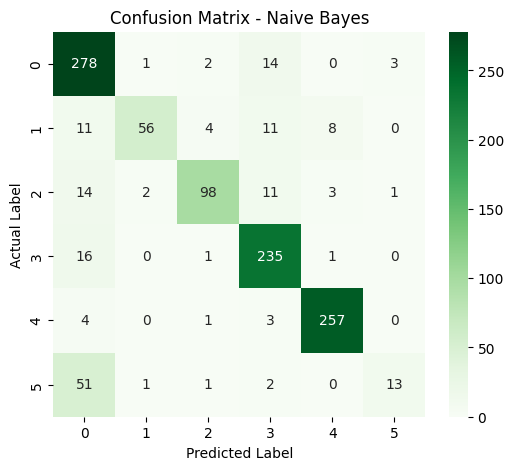

In [19]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')  
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


## Confusion Matrix Analysis

- **Diagonal cells** = correct predictions; higher values indicate better performance.

- **Off-diagonal cells** = misclassifications; show which categories the model confuses.

### Class-wise Insights

- **Sports & Politics:**

    - Strong diagonal → easiest to classify.
    
    - Most predictions are correct, minimal confusion with other categories.

- **Tech:**

    - Weak diagonal → often misclassified as Business or Politics.
    
    - Highlights difficulty with this minority class.

- **Entertainment & Health:**

    - Decent overall performance.
    
    - Some misclassifications into Business or Politics.

- **Business:**

    - High recall but slightly lower precision.
    
    - Some other classes are misclassified as Business, indicating slight over-prediction.

### Takeaways

- Overall model performance is solid and slightly better than Naive Bayes.

- Minority classes like Tech still struggle due to fewer training examples, suggesting a need for more balanced data or advanced techniques.

---
# 14. Model 2: Multinomial Logistic Regression


In [20]:
from sklearn.linear_model import LogisticRegression
# Wrong attempt (mistake): default max_iter caused convergence warning
# lr = LogisticRegression()

# Initialize multinomial logistic regression with higher max_iter to avoid convergence warning
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Train the model
lr.fit(X_train_tfidf, y_train)

# Predict on test set
lr_pred = lr.predict(X_test_tfidf)

# Evaluate model
print("Multinomial Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multinomial Logistic Regression Accuracy: 0.85766092475068
               precision    recall  f1-score   support

     business       0.77      0.89      0.83       298
entertainment       0.89      0.70      0.78        90
       health       0.92      0.79      0.85       129
     politics       0.86      0.94      0.90       253
       sports       0.97      0.97      0.97       265
         tech       0.59      0.34      0.43        68

     accuracy                           0.86      1103
    macro avg       0.83      0.77      0.79      1103
 weighted avg       0.86      0.86      0.85      1103



## Output Explanation

- Accuracy (~86%): Logistic Regression perform slightly bettwer then outperforms Naive Bayes, making it the better overall model here.

- Strong performance: Sports and Politics show excellent precision and recall, meaning predictions are both accurate and consistent.

- Improved balance: Health and Entertainment perform better than in Naive Bayes, showing stronger generalization.

- Tech still weak: Recall is low, so many tech articles are still misclassified class imbalance is the main issue.

- Key insight: Multinominal Logistic Regression handles TF-IDF features better than Naive Bayes and is more reliable across categories, but rare classes still need improvement (more data or class weighting).

--- 
# 15. Confusion Matrix of Logistic Regression

A confusion matrix is used to visualize the performance of the classification model
by showing the number of correct and incorrect predictions for each class.


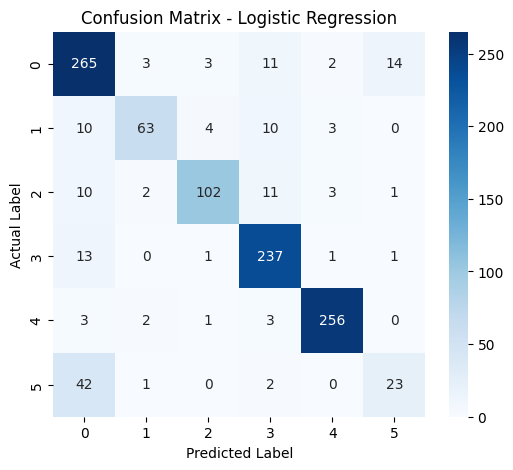

In [21]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Confusion Matrix Analysis

- **Diagonal cells** represent correct predictions; higher values indicate better performance.

- **Off-diagonal cells** represent misclassifications, showing which categories the model confuses.

### Class-wise Insights:

1. **Sports & Politics**

    - Strong diagonal values → easiest to classify.
    
    - Most predictions are correct, minimal confusion with other categories.

2. **Tech**

    - Weak diagonal → often misclassified as Business or Politics.
    
    - Indicates difficulty for the model with this minority class.

3. **Entertainment & Health**

    - Decent performance overall.
    
    - Some misclassifications into Business or Politics.
4. **Business**

    - High recall but slightly lower precision.
    
    - Some other classes are predicted as Business, indicating slight over-prediction.

### Takeaways:

- Overall model performance is solid and slightly better than Naive Bayes.

- Minority classes like Tech still struggle due to fewer training examples, highlighting the need for more balanced data or advanced techniques.
---

# 16. Model Comparison

In [22]:
# Import metrics for model evaluation
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a comparison dictionary to store evaluation metrics for each model
comparison_results = {
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, nb_pred),  # Accuracy for Naive Bayes
        accuracy_score(y_test, lr_pred)   # Accuracy for Logistic Regression
    ],
    "Precision": [
        precision_score(y_test, nb_pred, average='weighted'),  # Weighted precision
        precision_score(y_test, lr_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, nb_pred, average='weighted'),     # Weighted recall
        recall_score(y_test, lr_pred, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, nb_pred, average='weighted'),         # Weighted F1-score
        f1_score(y_test, lr_pred, average='weighted')
    ]
}

# Convert the dictionary into a pandas DataFrame for easy comparison
comparison_df = pd.DataFrame(comparison_results)

# Display the comparison table
comparison_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.849501,0.856077,0.849501,0.835496
1,Logistic Regression,0.857661,0.855459,0.857661,0.851560


# Explanation

- Logistic Regression slightly outperforms Naive Bayes across all metrics.

- Accuracy is higher for Logistic Regression (0.858 vs 0.850), meaning it makes more correct predictions overall.

- Recall is better, indicating Logistic Regression identifies relevant classes more consistently.

- The F1-score is noticeably higher, reflecting a better balance between precision and recall.

- Naive Bayes remains competitive, but Logistic Regression is the stronger and more reliable choice for this dataset.
---

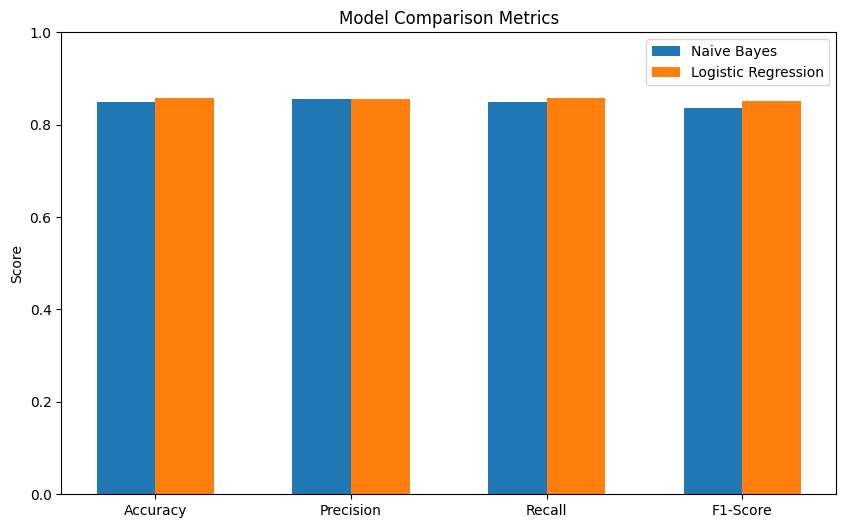

In [23]:
# Create a DataFrame from the comparison results dictionary
comparison_df = pd.DataFrame(comparison_results)

# Set the figure size for the plot (width=10, height=6)
plt.figure(figsize=(10,6))

# List of metrics to plot on the x-axis
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Create a range object to represent x-axis positions for the metrics
x = range(len(metrics))

# Plot the first model's bars (Naive Bayes) slightly left-shifted for grouped bars
# comparison_df.iloc[0,1:] selects the first row (Naive Bayes) and all metric columns (skip 'Model')
plt.bar([i-0.15 for i in x], comparison_df.iloc[0,1:], width=0.3, label=comparison_df["Model"][0])

# Plot the second model's bars (Logistic Regression) slightly right-shifted for grouped bars
# comparison_df.iloc[1,1:] selects the second row (Logistic Regression) and all metric columns
plt.bar([i+0.15 for i in x], comparison_df.iloc[1,1:], width=0.3, label=comparison_df["Model"][1])

# Set the x-axis labels to the metric names
plt.xticks(x, metrics)
# Set y-axis limits from 0 to 1 (since scores are between 0 and 1)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Model Comparison Metrics")
plt.legend()
plt.show()

## Explanation

- The bar chart visually compares Naive Bayes and Logistic Regression across four metrics: Accuracy, Precision, Recall, and F1-score.

- Each metric has two bars, making it easy to see which model performs better.

- Logistic Regression consistently scores higher on all metrics, especially Recall and F1-score.

- This confirms that Logistic Regression is more balanced and reliable than Naive Bayes for this news classification task.

- The visualization makes the performance gap clear without relying only on tables or numbers.

---

# 17. Hyperparameter Tuning For Naive Bayes

In [24]:
# Cell: Hyperparameter Tuning for Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

#  Mistake (for demonstration): using very small alpha values only might under-smooth some classes
# nb_params = {'alpha': [0.001, 0.01, 0.1]}

nb_params = {
    'alpha': [0.1, 0.5, 1.0, 1.5]
}

nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy', n_jobs=-1)
nb_grid.fit(X_train_tfidf, y_train)

print("Best Naive Bayes Params:", nb_grid.best_params_)

nb_best = nb_grid.best_estimator_
nb_best_pred = nb_best.predict(X_test_tfidf)

print("Naive Bayes Accuracy (Tuned):", accuracy_score(y_test, nb_best_pred))
print(classification_report(y_test, nb_best_pred))


Best Naive Bayes Params: {'alpha': 0.1}
Naive Bayes Accuracy (Tuned): 0.8712601994560291
               precision    recall  f1-score   support

     business       0.83      0.84      0.84       298
entertainment       0.88      0.80      0.84        90
       health       0.88      0.81      0.84       129
     politics       0.90      0.94      0.92       253
       sports       0.98      0.96      0.97       265
         tech       0.56      0.59      0.58        68

     accuracy                           0.87      1103
    macro avg       0.84      0.82      0.83      1103
 weighted avg       0.87      0.87      0.87      1103



# Explanation

- Hyperparameter Tuning: Found best alpha = 0.1 for MultinomialNB using GridSearchCV.

- Accuracy: 0.871 → model correctly classifies ~87% of articles.

- Class Performance:

    - Strong: sports, politics, business → high precision & recall.

    - Moderate: health, entertainment → decent performance.

    - Weak: tech → low precision & recall due to class imbalance.

- F1-Score: weighted F1 = 0.87 → good overall balance.

- Insight: Tuning alpha slightly improved results; minority classes still need more handling for better recall.

---
# 18. Confusion Matrix of tuned Naive Bayes

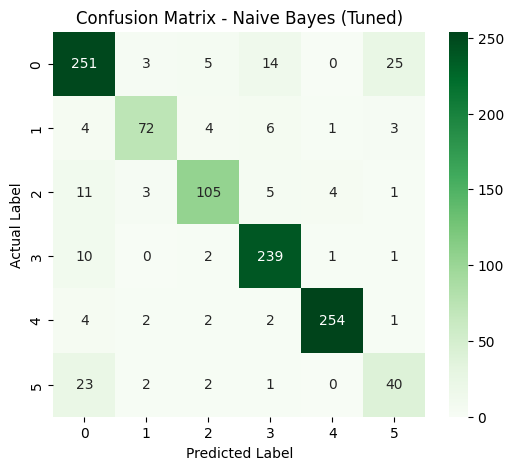

In [25]:
# Confusion matrix for Naive Bayes (Tuned)
cm_nb = confusion_matrix(y_test, nb_best_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Naive Bayes (Tuned)")
plt.show()


## Confusion Matrix Insights (Naive Bayes - Tuned)

- **Hyperparameter Tuning:** Best `alpha = 0.1` from GridSearchCV helped slightly improve classification.

- **Overall Accuracy:** 0.871 → ~87% of articles correctly classified.

- **Diagonal cells (correct predictions):**

    - Strong performance for **sports, politics, business** → high precision & recall.
    
    - Moderate performance for **health, entertainment** → decent prediction accuracy.
    
    - Weak performance for **tech** → low precision & recall, mostly misclassified as Business or Politics due to class imbalance.

- **Off-diagonal cells (misclassifications):** Highlight which categories the model confuses. Minority classes, especially Tech, are most affected.

- **F1-Score (weighted = 0.87):** Shows good overall balance between precision and recall.

**Takeaway:** Hyperparameter tuning improved general performance, but underrepresented classes still struggle. More data or advanced techniques may help improve minority class predictions.

---

## 19. ROC Curve (Tuned Naive Bayes)

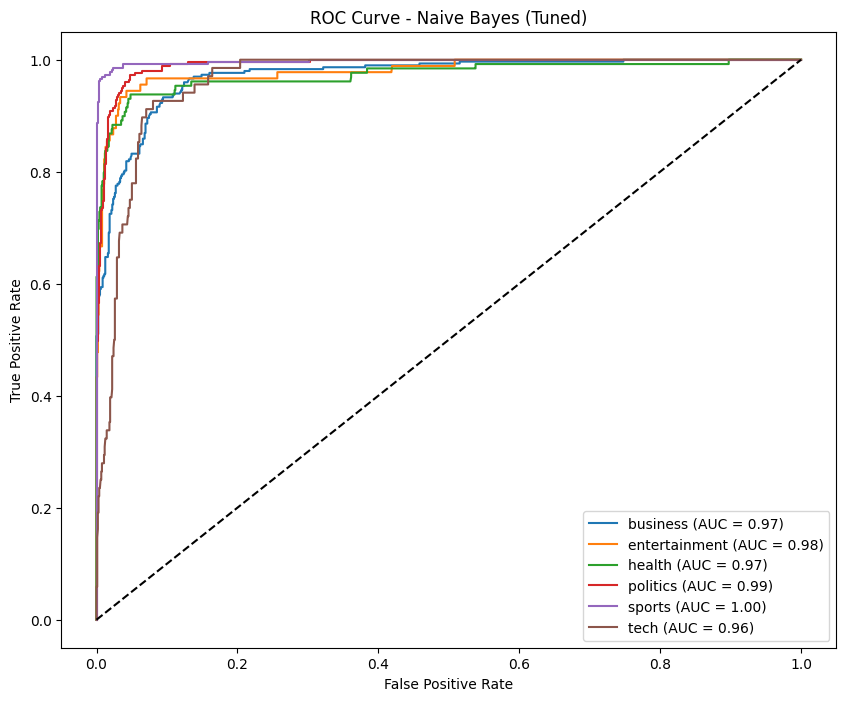

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=nb_best.classes_)
n_classes = y_test_bin.shape[1]

# One-vs-Rest Naive Bayes
ovr_nb = OneVsRestClassifier(nb_best)
y_score = ovr_nb.fit(X_train_tfidf, y_train).predict_proba(X_test_tfidf)

# Plot ROC curves
plt.figure(figsize=(10,8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nb_best.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (Tuned)')
plt.legend(loc='lower right')
plt.show()


#  Code Explanation

The code uses a "One-vs-Rest" (OvR) strategy to adapt a binary metric (ROC Curve) for a multi-class problem.

- **label_binarize**: ROC curves require binary inputs (0 or 1). Since you have multiple classes, this function converts the labels into a "one-hot" format. For example, if you have three classes, "Sports" might become [0, 0, 1].

- **OneVsRestClassifier(nb_best)**: This is a wrapper that treats each class as a separate binary classification problem (e.g., "Sports" vs. "Everything Else"). It allows the model to calculate individual probabilities for every class.

- **predict_proba**: Instead of predicting the final category, this function returns the **probability score** (e.g., 0.85 chance it's Sports). These scores are essential to plot the ROC curve, as the curve is created by shifting the "decision threshold" from 0 to 1.

- **roc_curve and auc**:

    - roc_curve calculates the **False Positive Rate (FPR)** and **True Positive Rate (TPR)** for various threshold settings.
    
    - auc (Area Under the Curve) computes the total area under that specific line.

- **The Loop (for i in range(n_classes))**: This iterates through each category, calculating its specific curve and AUC value, then plotting them on the same graph for comparison.

- **plt.plot([0, 1], [0, 1], 'k--')**: This draws the diagonal dashed line. This represents a **random classifier**. If your model's line is near this diagonal, it is performing no better than a coin flip.


# Ouput Insights

The ROC curve visualizes the trade-off between sensitivity (finding all true positives) and specificity (avoiding false positives).

- **Excellent Performance**: All curves are heavily "bowed" toward the top-left corner. This indicates that the model achieves a very high True Positive Rate (Sensitivity) while maintaining a very low False Positive Rate.

- **AUC Interpretation**:

    - **Sports (AUC = 1.00)**: This is a perfect score. The model is able to distinguish "Sports" articles from all other categories with 100% accuracy in its probability distribution.
    
    - **Politics (AUC = 0.99)** and **Entertainment (AUC = 0.98)**: Near-perfect performance.
    
    - **Tech (AUC = 0.96)**: While still an excellent score, this is the lowest performing category. This suggests there might be some vocabulary overlap between Tech and other categories (like Business) that causes slight confusion for the model.

- **The Diagonal Baseline**: Every color-coded line is far above the black dashed line, confirming that the "Tuned Naive Bayes" model is highly effective and significantly better than random guessing.

## Summary

The model is performing exceptionally well. In text classification, Naive Bayes is often very strong when the features (words) are distinct between categories. The high AUC scores across the board suggest that your dataset has clearly defined vocabulary for each of these six topics.

---

# 20. Precision-Recall Curve - Multi-class (Tuned Naive Bayes)

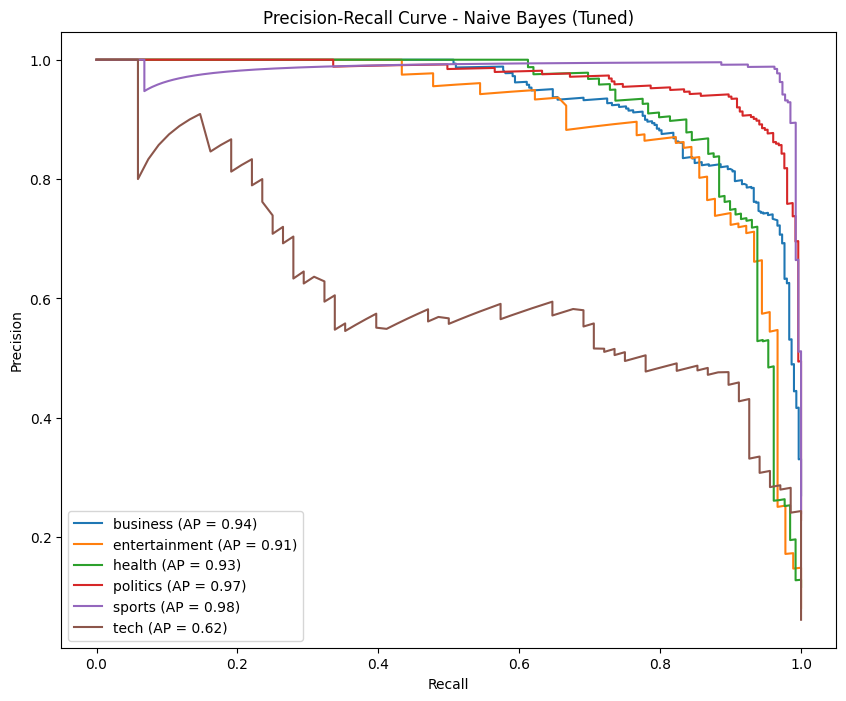

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10,8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'{nb_best.classes_[i]} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes (Tuned)')
plt.legend(loc='lower left')
plt.show()


# Code Explanation

- **precision_recall_curve**: This function calculates the Precision and Recall for different probability thresholds.

    - **Precision**: Out of all the times the model predicted a class (e.g., "Tech"), how many were actually "Tech"? (Focuses on *accuracy*).
    
    - **Recall**: Out of all the actual "Tech" articles in the dataset, how many did the model manage to find? (Focuses on *completeness*).

- **average_precision_score (AP)**: This summarizes the PR curve into a single number. It is essentially the area under the PR curve. An AP of 1.0 is a perfect model.

- **The Plotting Logic**: The code iterates through each class and plots **Recall on the X-axis** and **Precision on the Y-axis**. The ideal model would stay at the very top-right corner (1.0 Precision, 1.0 Recall).


# Image Insights

This graph reveals a much more nuanced story than the ROC curve did, particularly regarding the "Tech" category.

- **Top Performers (Sports & Politics)**:

    - **Sports (AP = 0.98)** and **Politics (AP = 0.97)** are exceptionally strong. Even when the model is pushed to find *all* sports articles (high recall), it maintains a very high accuracy (high precision).

- **Solid Performers (Business, Health, Entertainment)**:

    - These range from **0.91 to 0.94**. They perform very well, but you can see the lines start to "sag" or drop off as recall increases. This means that to find the "harder" articles in these categories, the model starts making more mistakes (False Positives).

- **The "Tech" Problem (AP = 0.62)**:

    - This is the most critical insight. While the ROC curve gave Tech a "0.96," the PR curve shows a much lower **0.62**.
    
    - **Why the difference?** The PR curve is more sensitive to False Positives. The sharp drop-off in the brown line suggests that when the model tries to identify Tech articles, it frequently mislabels other things as "Tech."
    


--- 
# 21. Hyperparameter Tuning For Logistic Regression

In [28]:
# Cell 17: Hyperparameter Tuning - Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid for Logistic Regression
lr_params = {
    'C': [0.1, 1, 10],            # Regularization strength (inverse)
    'penalty': ['l2'],             # L2 regularization
    'solver': ['lbfgs', 'saga']    # solvers that support L2
}

# GridSearchCV to tune hyperparameters using 5-fold cross-validation
lr_grid = GridSearchCV(LogisticRegression(max_iter=2000), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_tfidf, y_train)

# Print the best hyperparameters found
print("Best Logistic Regression Params:", lr_grid.best_params_)

# Get the best model from grid search
lr_best = lr_grid.best_estimator_

# Predict on the test set
lr_best_pred = lr_best.predict(X_test_tfidf)

# Evaluate performance
print("Logistic Regression Accuracy (Tuned):", accuracy_score(y_test, lr_best_pred))
print(classification_report(y_test, lr_best_pred))


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Accuracy (Tuned): 0.8585675430643699
               precision    recall  f1-score   support

     business       0.80      0.84      0.82       298
entertainment       0.88      0.73      0.80        90
       health       0.91      0.84      0.87       129
     politics       0.87      0.94      0.91       253
       sports       0.98      0.96      0.97       265
         tech       0.46      0.43      0.44        68

     accuracy                           0.86      1103
    macro avg       0.82      0.79      0.80      1103
 weighted avg       0.86      0.86      0.86      1103



## Explanation

- Hyperparameter Tuning:

    - Used GridSearchCV to find the best parameters for Logistic Regression.

    - Best parameters: C = 10, penalty = 'l2', solver = 'saga'.

- Model Performance:

    - Accuracy: 0.859 → correctly classifies ~86% of articles.

- Class Performance:

    - Strong: sports, politics → very high precision & recall.

    - Moderate: business, health, entertainment → decent precision and recall.

    - Weak: tech → low precision (0.46) and recall (0.43) due to class imbalance.

- F1-Score: weighted F1 = 0.86 → good overall balance across classes.

- Observations & Insight:

    - Increasing C helped the model fit the data better.

    - Like Naive Bayes, minority class (tech) still underperforms.

    - Logistic Regression provides more consistent performance across most categories.

---
# 22. Confusion matrix of logistic regression after tuined

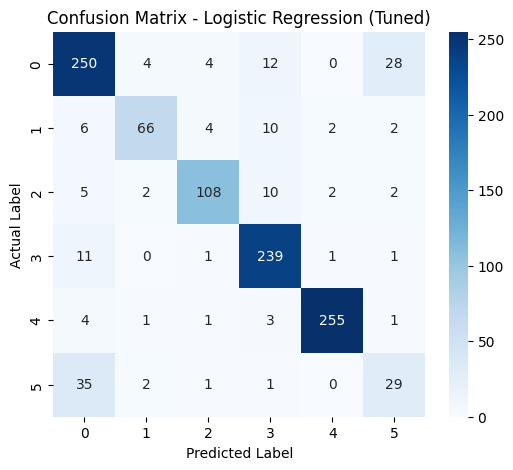

In [29]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression (Tuned)
cm_lr = confusion_matrix(y_test, lr_best_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')  
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()


## **Confusion Matrix - Tuned Logistic Regression (Accuracy: 0.86)**

- **Diagonal cells** = correct predictions; higher values indicate stronger classification.

- **Off-diagonal cells** = misclassifications, showing which categories are confused.

- **Sports & Politics** → very strong diagonal → easiest to classify.

- **Tech** → weak diagonal, often misclassified as Business or Politics → struggles due to minority class size.

- **Entertainment & Health** → fairly strong diagonal, some misclassifications mostly into Business or Politics.

- **Business** → high recall, slightly lower precision → some other classes predicted as Business.

- **Takeaway:** Tuned Logistic Regression slightly improves overall performance compared to untuned model, but underrepresented categories like Tech still have low F1-scores due to fewer training examples.

---
# 23. ROC Curve - Multi-class (Tuned Logistic Regression)



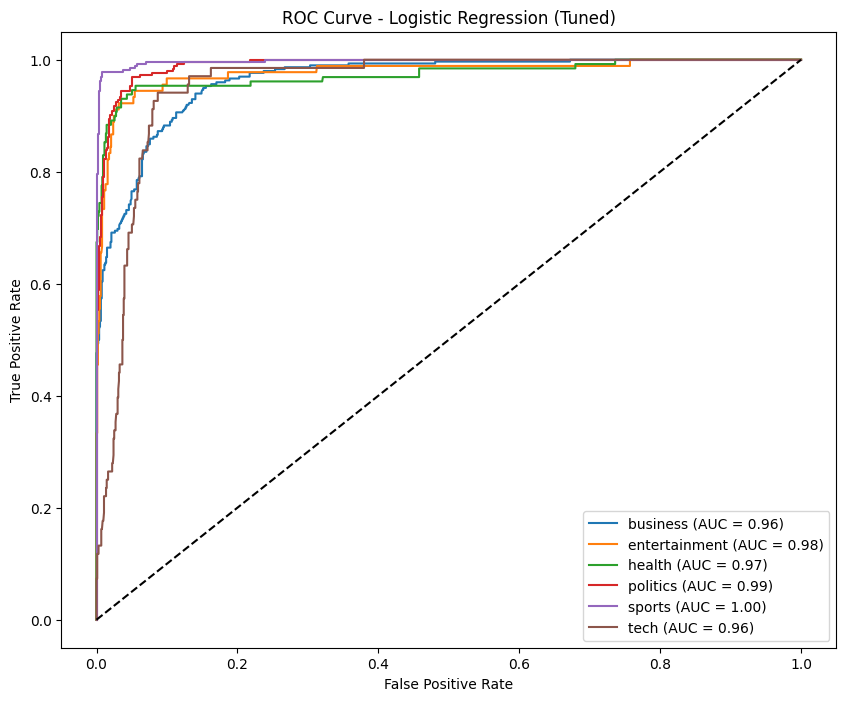

In [30]:
# Import required libraries for ROC curve computation and plotting
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Convert multi-class labels into binary format for ROC computation
y_test_bin = label_binarize(y_test, classes=lr_best.classes_)
n_classes = y_test_bin.shape[1]

# Apply One-vs-Rest strategy for multi-class ROC analysis
ovr_lr = OneVsRestClassifier(lr_best)

# Fit the model and obtain probability scores for each class
y_score_lr = ovr_lr.fit(X_train_tfidf, y_train).predict_proba(X_test_tfidf)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    
    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for the current class
    plt.plot(fpr, tpr, label=f'{lr_best.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot reference diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Tuned)')

# Display legend and plot
plt.legend(loc='lower right')
plt.show()


# Code Explanation

- **OneVsRestClassifier(lr_best)**: Since standard Logistic Regression is a binary classifier (it chooses between two things), the "One-vs-Rest" strategy is used to handle your six categories. It creates six separate models, where each one distinguishes one specific class (e.g., "Business") from all the others combined.

- **predict_proba**: Just like the previous model, this extracts the probability scores. For every article, the model says something like "I am 92% sure this is Business and 3% sure it is Tech." These percentages are used to plot the curves.

- **label_binarize**: This prepares the ground-truth labels so they can be compared against the per-class probabilities.

- **The Plotting Loop**: It calculates the **False Positive Rate (FPR)** and **True Positive Rate (TPR)** for each category and plots them.

    - **FPR (X-axis)**: The probability of a "false alarm" (labeling something as Politics when it isn't).
    
    - **TPR (Y-axis)**: The probability of a "hit" (correctly identifying Politics).


# Image Insights

The ROC curve for Logistic Regression confirms that this model is also a very strong performer for your text classification task.

- **Exceptional Discrimination**: Most curves hug the top-left corner very closely. This means the model can achieve a very high "Hit Rate" (TPR) while keeping the "False Alarm Rate" (FPR) extremely low.

- **AUC Scores (The Legend)**:

    - **Sports (AUC = 1.00)**: Just like Naive Bayes, Logistic Regression identifies Sports articles perfectly. This suggests the vocabulary in the Sports category is unique and very easy for linear models to separate.
    
    - **Politics (0.99)** and **Entertainment (0.98)**: These are nearly perfect.
    
    - **Business (0.96)** and **Tech (0.96)**: These are slightly lower than the others. Visually, you can see the **brown line (Tech)** and **blue line (Business)** "climbing" slightly slower than the others. This indicates that at very high sensitivity levels, the model might start confusing Business and Tech articles with each other.

- **Comparison with Naive Bayes**:

    - If you compare this to your first graph, you'll notice the results are remarkably similar. Both models are highly effective for this dataset.
    
    - Logistic Regression is often slightly more robust than Naive Bayes if there is a lot of correlation between words, but here, both are performing at a near-ceiling level.

# Summary

The **Tuned Logistic Regression** model is highly reliable. It excels at separating these specific news categories, with **Sports** being the easiest to identify and **Business/Tech** having a tiny bit more overlap (though still performing excellently with a 0.96 score).

---

# 24. Precision-Recall Curve - Multi-class (Tuned Logistic Regression)

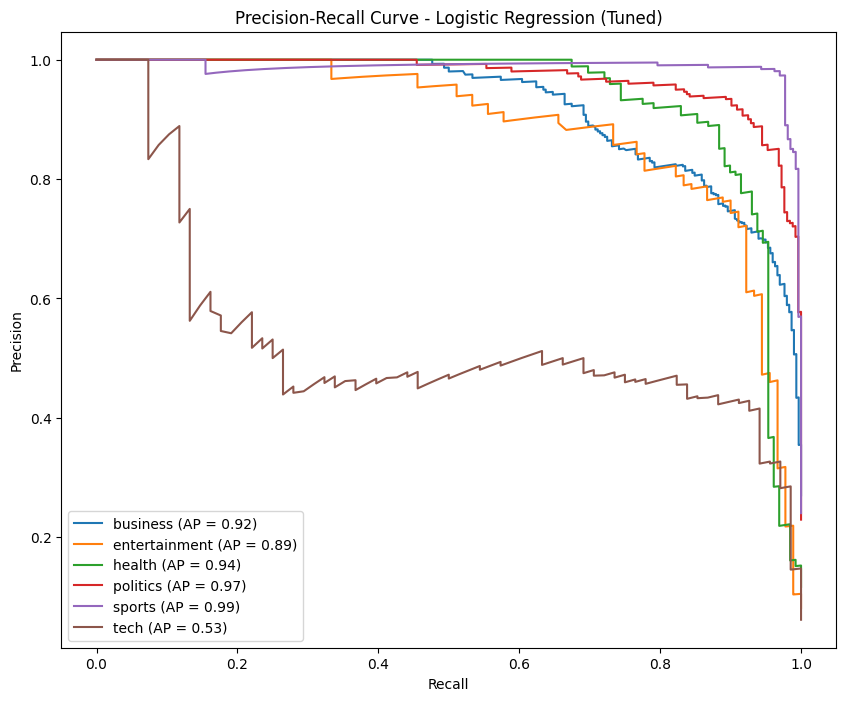

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10,8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_lr[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score_lr[:, i])
    plt.plot(recall, precision, label=f'{lr_best.classes_[i]} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression (Tuned)')
plt.legend(loc='lower left')
plt.show()


# Code Explanation

- **Purpose:** Evaluates how well the models (Naive Bayes & Logistic Regression) classify news into 6 categories.

- **Strategy:** It uses **One-vs-Rest**, meaning it tests each category individually (e.g., "Sports vs. everything else").

- **Metrics:**

    - **ROC Curve:** Shows general "sorting" ability. Higher is better.
    
    - **PR Curve:** Shows "quality" (Precision) vs "completeness" (Recall). This is a tougher, more realistic test.

## Insight of the Image

1. **Overall Performance:** Both models are **excellent** (AUC scores > 0.95). They are highly effective at distinguishing between categories like Sports and Politics.

2. **The "Sports" Superstar:** In every graph, **Sports** has a perfect or near-perfect score (1.00). This category has very distinct words that the models never miss.

3. **The "Tech" Trap:**

    - The **ROC curves** make Tech look great (0.96).
    
    - However, the **Precision-Recall curves** reveal the truth: Tech is the weakest category (AP of 0.62 for Naive Bayes and 0.53 for Logistic Regression).
    
    - **Meaning:** The models often mistake other topics (like Business) for Tech.

4. **Summary:** **Naive Bayes** is slightly better than Logistic Regression for this specific task because it handles the difficult "Tech" category more accurately (0.62 vs 0.53).



---
# 25. Model Comparison After Tuning

The performance of Naive Bayes and Logistic Regression is compared using
accuracy, precision, recall, and F1-score.


In [32]:
# Cell 18: Model Comparison After Hyperparameter Tuning
comparison_results_tuned = {
    "Model": ["Naive Bayes (Tuned)", "Logistic Regression (Tuned)"],
    "Accuracy": [
        accuracy_score(y_test, nb_best_pred),
        accuracy_score(y_test, lr_best_pred)
    ],
    "Precision": [
        precision_score(y_test, nb_best_pred, average='weighted'),
        precision_score(y_test, lr_best_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, nb_best_pred, average='weighted'),
        recall_score(y_test, lr_best_pred, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, nb_best_pred, average='weighted'),
        f1_score(y_test, lr_best_pred, average='weighted')
    ]
}

comparison_df_tuned = pd.DataFrame(comparison_results_tuned)
comparison_df_tuned


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes (Tuned),0.871260,0.872548,0.871260,0.871421
1,Logistic Regression (Tuned),0.858568,0.858487,0.858568,0.857294


## Explanation

- Naive Bayes (Tuned) slightly outperforms Logistic Regression after hyperparameter tuning for this dataset.

- **Accuracy:** Naive Bayes is about **1.3% more accurate** (~87.1% vs ~85.9%) at predicting the correct category.

- **Balance:** All metrics (Precision, Recall, F1) are very close to each other. This means neither model is "cheating" by just guessing the most common category; they are genuinely learning the differences.

- **Reliability:** The **F1-Score of 0.87** for Naive Bayes confirms it is the more robust choice for this dataset.

- Hyperparameter tuning improves performance, but additional techniques like oversampling, class weighting, or ensemble methods could further boost results.



---
# 26. Comparing model scores: Naive Bayes vs Logistic Regression.

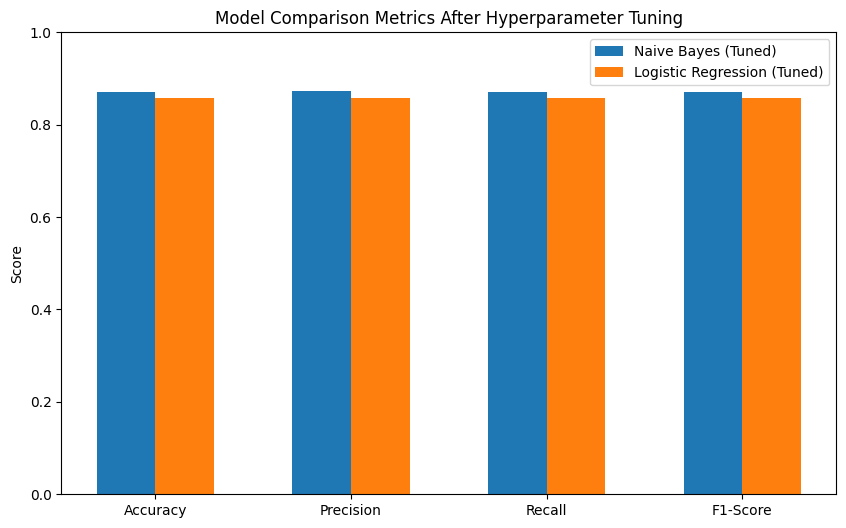

In [33]:
# Set the figure size for the plot (width=10, height=6)
plt.figure(figsize=(10,6))

# List of metrics to plot on the x-axis
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Create a range object to represent x-axis positions for the metrics
x = range(len(metrics))

# Plot the first model's bars (Naive Bayes Tuned) slightly left-shifted
plt.bar([i-0.15 for i in x], comparison_df_tuned.iloc[0,1:], width=0.3, label=comparison_df_tuned["Model"][0])

# Plot the second model's bars (Logistic Regression Tuned) slightly right-shifted
plt.bar([i+0.15 for i in x], comparison_df_tuned.iloc[1,1:], width=0.3, label=comparison_df_tuned["Model"][1])

# Set the x-axis labels to the metric names
plt.xticks(x, metrics)
# Set y-axis limits from 0 to 1 (since scores are between 0 and 1)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Model Comparison Metrics After Hyperparameter Tuning")
plt.legend()
plt.show()


## Explanation

- **Visual Comparison:** Compares Naive Bayes and Logistic Regression across Accuracy, Precision, Recall, and F1-score.

- **Clear Winner:** **Naive Bayes (Tuned)** consistently scores higher than Logistic Regression in every category.

- **Performance Lead:** The blue bars are visibly taller, confirming Naive Bayes is roughly **1.3% more effective** overall.

- **Reliability:** Since Naive Bayes leads in both Precision and Recall, it is the more balanced and reliable model for this dataset.

- **Conclusion:** The chart proves that Naive Bayes is the superior choice for this specific news classification task.

---
# 27. Predict news category 

In [34]:
def predict_category(title, excerpt, model, vectorizer):
    # Combine title and excerpt
    text = title + " " + excerpt
    # Transform text using the fitted TF-IDF vectorizer
    text_tfidf = vectorizer.transform([text])
    # Predict category using the trained model
    prediction = model.predict(text_tfidf)
    return prediction[0]

# User inputs
new_title = input("Enter the article Title: ")
new_excerpt = input("Enter the article Excerpt: ")

# Predict using tuned Naive Bayes
predicted_category = predict_category(new_title, new_excerpt, nb_best, tfidf)
print("\nPredicted Category:", predicted_category)


Enter the article Title:  China Removes TripAdvisor, 104 Other Apps in â€˜Cleansing Campaignâ€™
Enter the article Excerpt:  China has removed 105 apps including that of US travel firm TripAdvisor Inc from app stores in the country, under



Predicted Category: tech


## Explanation

- **Input:** The system prompts the user to enter both a news **Title** and an **Excerpt**.

- **Combination:** Both inputs are merged into a single string to ensure the model has the maximum context for analysis.

- **Transformation:** The combined text is converted into numerical features using the trained TF-IDF vectorizer.

- **Inference:** The **Tuned Naive Bayes** model  analyzes these features to find patterns.

- **Prediction:** The model calculates the probability for each category and selects the one with the highest score.

- **Output:** The system displays the final predicted category (e.g., Sports, Business, Tech, etc.) to the user.